In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
import cv2
import numpy as np
import enum


class TrafficLight(enum.Enum):
    RED = 1,
    YELLOW = 2,
    GREEN = 3,
    UNKNOWN = 4


def binary_to_3_channel_img(binary_img):
    new_img = np.dstack((binary_img, binary_img, binary_img)) * 255
    return new_img


def render_recognized_circles(image, circles, border_color=(0, 0, 0), center_color=(0, 0, 255)):
    for i in circles[0, :]:
        # draw the outer circle
        cv2.circle(image, (i[0], i[1]), i[2], border_color, 2)
        # draw the center of the circle
        cv2.circle(image, (i[0], i[1]), 2, center_color, 3)


def recognize_light(image, lower_range, upper_range):
    ranged_image = cv2.inRange(image, lower_range, upper_range)
    return ranged_image


def get_hough_circles(weighted_image):
    blur_img = cv2.GaussianBlur(weighted_image, (15, 15), 0)

    circles = cv2.HoughCircles(blur_img, cv2.HOUGH_GRADIENT, 0.5, 41, param1=70, param2=30, minRadius=5, maxRadius=150)
    return circles


def recognize_red_light(hsv_image):
    lower_red = np.array([0, 50, 50])
    upper_red = np.array([10, 255, 255])
    red1 = recognize_light(hsv_image, lower_red, upper_red)

    lower_red = np.array([170, 50, 50])
    upper_red = np.array([180, 255, 255])
    red2 = recognize_light(hsv_image, lower_red, upper_red)

    weighted_img = cv2.addWeighted(red1, 1.0, red2, 1.0, 0.0)
    return get_hough_circles(weighted_img)


def recognize_green_light(hsv_image):
    lower_green = np.array([50, 0, 50])
    upper_green = np.array([0, 50, 0])
    green1 = recognize_light(hsv_image, lower_green, upper_green)

    lower_green = np.array([50, 170, 50])
    upper_green = np.array([255, 255, 255])
    green2 = recognize_light(hsv_image, lower_green, upper_green)

    weighted_img = cv2.addWeighted(green1, 1.0, green2, 1.0, 0.0)
    return get_hough_circles(weighted_img)


def recognize_yellow_light(hsv_image):
    plt.figure()
    plt.imshow(hsv_image)
    lower_yellow = np.array([0, 200, 200])
    upper_yellow = np.array([50, 255, 255])
    yellow1 = recognize_light(hsv_image, lower_yellow, upper_yellow)
    plt.figure()
    plt.imshow(binary_to_3_channel_img(yellow1))

    lower_yellow = np.array([50, 200, 200])
    upper_yellow = np.array([100, 255, 255])
    yellow2 = recognize_light(hsv_image, lower_yellow, upper_yellow)
    plt.figure()
    plt.imshow(binary_to_3_channel_img(yellow2))

    weighted_img = cv2.addWeighted(yellow1, 1.0, yellow2, 1.0, 0.0)
    plt.figure()
    plt.imshow(binary_to_3_channel_img(weighted_img))
    return get_hough_circles(weighted_img)

def recognize_traffic_lights(image):
    # Convert to HSV color space to recognize the traffic light
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    red_circles = recognize_red_light(hsv_image)
    if red_circles is not None:
        render_recognized_circles(image, red_circles, border_color=(255, 255, 0))
        return image, TrafficLight.RED

    green_circles = recognize_green_light(hsv_image)
    if green_circles is not None:
        render_recognized_circles(image, green_circles, border_color=(255, 0, 0))
        return image, TrafficLight.GREEN

    yellow_circles = recognize_yellow_light(hsv_image)
    if yellow_circles is not None:
        render_recognized_circles(image, yellow_circles, border_color=(255, 0, 0))
        return image, TrafficLight.YELLOW

    return image, TrafficLight.UNKNOWN


In [112]:
image = cv2.imread('659.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

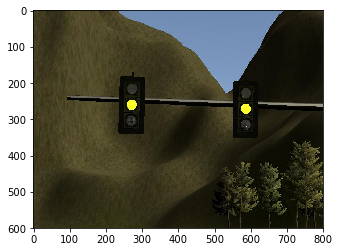

In [113]:
plt.imshow(image)

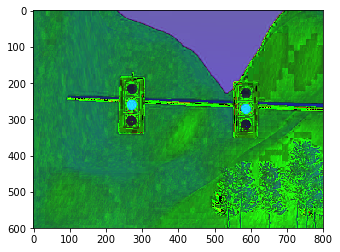

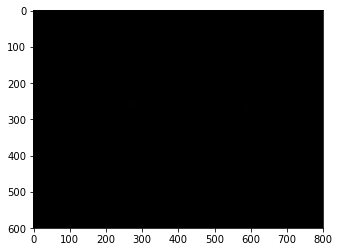

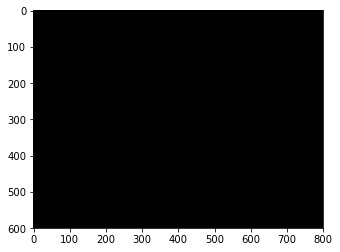

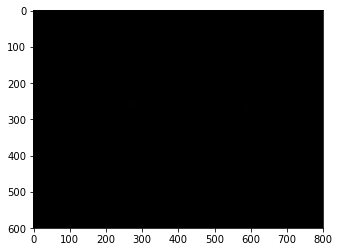

In [114]:
output_image, traffic_light = recognize_traffic_lights(image)

TrafficLight.YELLOW


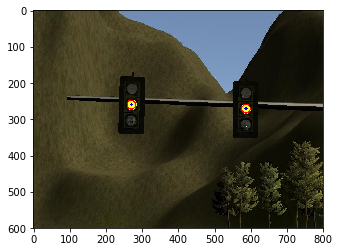

In [115]:
print(traffic_light)
plt.imshow(output_image)

In [116]:
import numpy as np
yellow = np.uint8([[[200,200,0 ]]])
hsv_yellow = cv2.cvtColor(yellow,cv2.COLOR_BGR2HSV)
print(hsv_yellow)

[[[ 90 255 200]]]
